# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [68]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [69]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [70]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#Note: Used summary statistics above to collect three customers that vary significantly 

indices=[23,29,412]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  26373  36423    22019    5154              4337         16523
1  43088   2100     2609    1200              1107           823
2     97   3605    12400      98              2970            62

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

For the first data point in our sample, it's clear that the customer is not only spending more than the mean amount across all categories, but that they are spending more than at least 75% of other customers, across all categories. This indicates that the customer is likely a supermarket or relatively large grocery store, as such a customer would need to be well-stocked across all product categories. Because this customer spends so much across product categories, I might expect that they are a corporate supermarket. They could also be a smaller, wholesale retailer, because they clearly exceed the average spending in each category. 

For the second data point in our sample, the customer clearly spends a disproportionate amount of their money on the "fresh" category. In fact, this purchaser spends over 84% of their total budget on fresh items, whereas the average customer spends less than 37% of their budget on the fresh category. Excluding 'fresh' products though, customer 2 spends less than the mean amount, if we look at each of the remaining product categories. That said, customer 2's spending within the fresh category is more than two standard deviations from the category mean. Therefore, we might predict that customer 2 is either a chain of restaurants specializing in the sale of fresh products (say, salads). We might conclude that their brand is built on this "Fresh-focused" distinction. 

For the third data point in our sample, we can immediately see that the customer spends far less than average in the categories "Fresh", "frozen", and "Delicatessen". In fact, customer 3 spends close to the minimum within each of these respective categories. That said, they spend more than average on grocery, and about the average amount on detergents_paper. With regards to the "milk: category, they spend near the 25th percentile. I would expect that this establishment is a "corner store" or larger gas station, because of the disparity across categories. The large proportion of grocery spending indicates that it is likely not a restaurant

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [71]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

import sklearn
from sklearn.cross_validation import train_test_split
data_no_dp = data.drop('Detergents_Paper', axis = 1)
col_removed = data['Detergents_Paper']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.

X_train, X_test, y_train, y_test = train_test_split(data_no_dp, 
                                                    col_removed, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)


# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)


0.722717896844


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** 

I attempted to predict 'Detergents_Paper'.
The prediction score, rounded to the third decimal, is .723.

The score, which is the correlation between actual spending in 'Detergents_Paper' and the predicted spending, indicates that the remaining features do a relatively good job in predicting 'Detergents_Paper' spending. As we learned in the course, this high R^2 score means that spending on Detergents_Paper is not necessarily independent of the other features. In summary, the higher the R^2 score of ~.723 indicates that the feature isn't likely to be the most important features for identifying a customer's spending habits.  

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Python27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


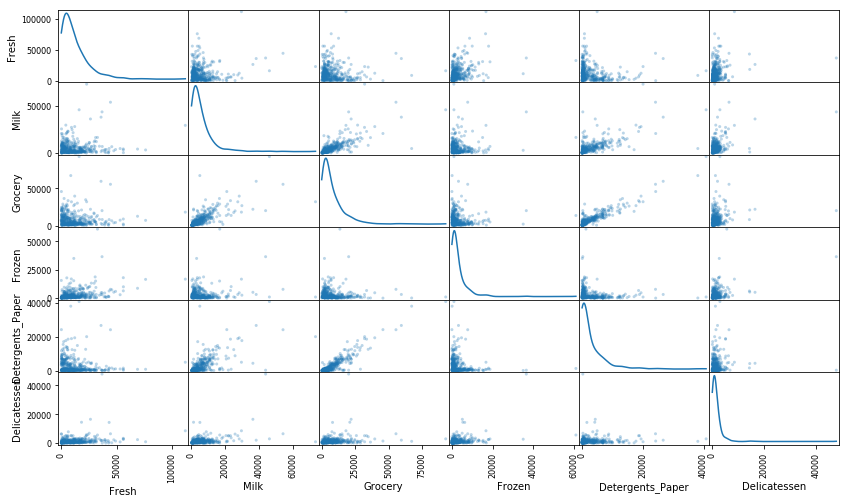

In [72]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

The data, within each category, is skewed right. This implies that unlike a normal distribution, the mean is to the right of the median. Visually, the skewed right distriubtion is implied by the long "tails" seen in each of the line graphs that run diagonally from the top left corner to bottom right corner. Additionally, this is indicated by the majority of scatterplot points being located in the bottom left corner (near zero) of each of the respective scatterplot graphs (i.e. the graphs NOT running diagonally from top left to bottom right). 

The features that exhibit a significant degree of correlation are indicated by the graphs where we can see a discernible line in the scatterplot, which implies a linear trend. For example: Detergents_Paper correlates with Grocery, Milk correlates with Grocery, and Milk correlates with Detergents_Paper.

This visual confirms the relevance (or lackthereof) of the feature I predicted, which was Detergents_Paper. My hypothesis was that this feature was relatively unimportant, insomuch that it could be indicated by other features. The graphs provide evidence to back up this hypothesis: Detergents_Paper looks to be highly correlated with both Grocery and Milk, immplying it is not a relatively important feature. 


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Python27\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


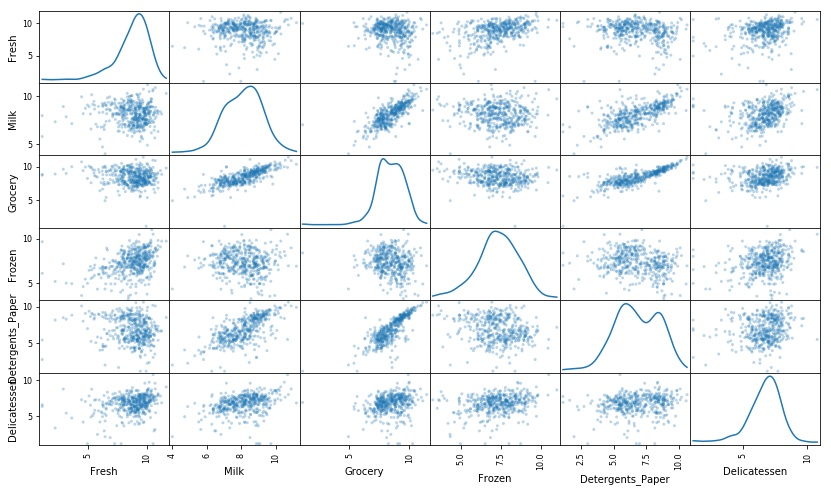

In [73]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [74]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.180096  10.502956  9.999661  8.547528          8.374938      9.712509
1  10.671000   7.649693  7.866722  7.090077          7.009409      6.712956
2   4.574711   8.190077  9.425452  4.584967          7.996317      4.127134

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [75]:
# For each feature find the data points with extreme high or low values -->We're searching for outliers
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove -->not removing any
outliers  = [65,66,154,75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

There are multiple data points that are outliers in multiple categories. For instance, customer 66 is an outlier in both the 'Fresh' and 'Delicatessen' categories. 

The question of whether to remove a data point is a complex question that can have major ramifications on the eventual clusters we assign. 

On the one hand, this data set is relatively small, with only a few hundred records in total, and six features per data point. Most real-world situations will have a much greater volume of data compared to this data set, and thus the IQR might be more representative of the entire population. 

Therefore: Because we have so few data points, clustering will be relatively easy to perform. Rather than conjecture as to whether these "multiple category" outliers will significantly affect grouping, I'll attempt the clustering algorithms under both circumstances. We can use the visualizations and silhoutte score to determine the relative success between including and excluding outliers.

Final notes (after running full program, once with outliers, once without outliers): I ran the program twice, once with no outliers and once with the four outliers listed above. Both models had similar silhouotte scores betwen, though, the 'outliers-excluded' model's score was slightly better: 0.419 vs. 0.415. Another difference was that the 'outliers-included' dataset optimized for k=3, and the 'oultiers removed' model was optimized on k=2. The k=2 model seemed to split the data more intuitively. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

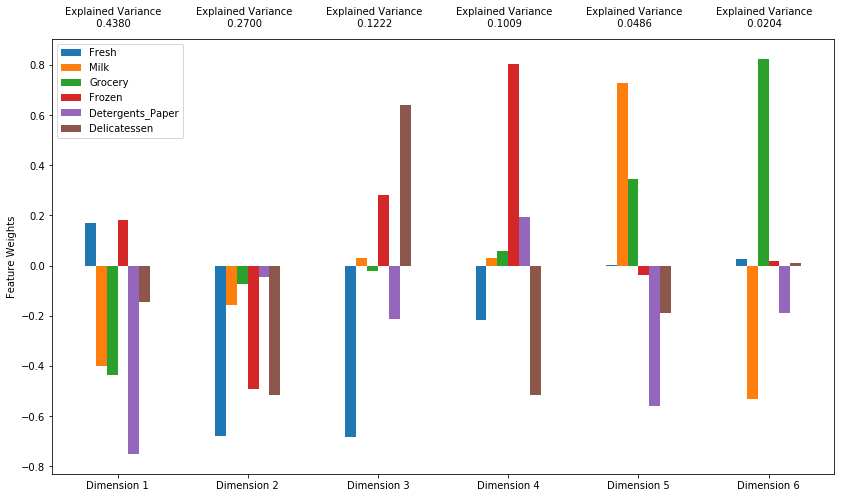

In [85]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features. Note: will probably dropoff DT af
from sklearn.decomposition import PCA
our_pca = PCA(n_components=6).fit(good_data) #asks for six dimensions at this point, will dropout column later

# TODO: Transform log_samples using the PCA fit above
pca_samples = our_pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, our_pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first and second principal components combine to explain 70.8% of the the variance in the data.
Additionally, first four prinicipal (in summation) explain 93.11% of the data. 

When analyzing the dimensions (the categories) that comprise the prinicipal components, it is important to recognize that the *absolute value* of the feature weight indicates its relative importance within a given principal component. In turn, this relative importance indicates how "well represented" the dimension is within a principal component. For example, we can consider an extreme hypothetical: if Milk and Dimension 5 had a correlation of -1, the feature milk would be maximally represented within Dimension 5. 

For Dimension 1: we see that Detergents_Paper is the feature most associated with the principal component, because its decline indicates the most significant change in the prinicipal component. Specifically, the absolute value of correlation is >.7, whereas it is <.5 for all other features. As Dimension 1 increase, the subsequent decline in Detergents_Paper is also associated with a decline in the grocery and milk categories (these 3 categories are associated). Delicatessen is relatively unimportant, but also negatively correlated with Dimension 1. Contrary to these four features, the Fresh and Frozen categories are positively correlated with Dimension 1. We might predict (though it's difficult to say for certain) that restaurants are represented by this feature, because of the positive correlation with fresh and frozen items, and the negative correlation for Detergents_Paper and Grocery. 

For Dimension 2: The three most represented features, being the features with the highest absolute value of correlation, are clearly the Fresh, Frozen, and Delicatessen categories, with Correlation < -0.4. The other three features are significantly less important, each with a correlation >-0.2. The fact that all features are negatively correlated with Dimension 2 indicates that this dimension could represent a gas station or other small business operator, especially because it lacks the typical markers of a grocery store (fresh and deli products). 

For Dimension 3: This is perhaps the most clear of all the dimensions, in terms of the distilling the two most important features. Delicatessen is strongly correlated with Dimension 3 (> 0.6), whereas the fresh category shares a strong negative correlation (< -0.6). Additionally: Frozen has a correlation ~ 0.3, Detergents Paper ~ -0.2, while both Grocery and Milk have correlations that are negligible. Therefore, we might reasonably predict that Delis, meat distributors, or other restaurants meat-oriented "specialty stores" are well represented within this category, because Delicatessen has such a high correlation, and fresh is strongly negatively correlated.

For Dimension 4: The frozen category is the most influential, with a positive correlation of roughly ~0.8. Additionally, this Dimension is negatively correlated with the Delicatessen category, with a correlation less than or equal to -0.5. As a result of the strong influence of the frozen category, we might predict that Dimension 4 represents a distributor specializing in frozen goods, particularly of non-meat related products. 



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [86]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.7872      -3.6917       1.0106      -0.4190       0.7538   
1       0.5757      -1.0899      -1.3943      -0.6184      -0.6657   
2      -2.1811       5.3647       0.1738       0.3136       0.2830   

   Dimension 6  
0      -0.1948  
1      -0.2268  
2       0.3495

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [87]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca_two = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca_two.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca_two.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [88]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.7872      -3.6917
1       0.5757      -1.0899
2      -2.1811       5.3647

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

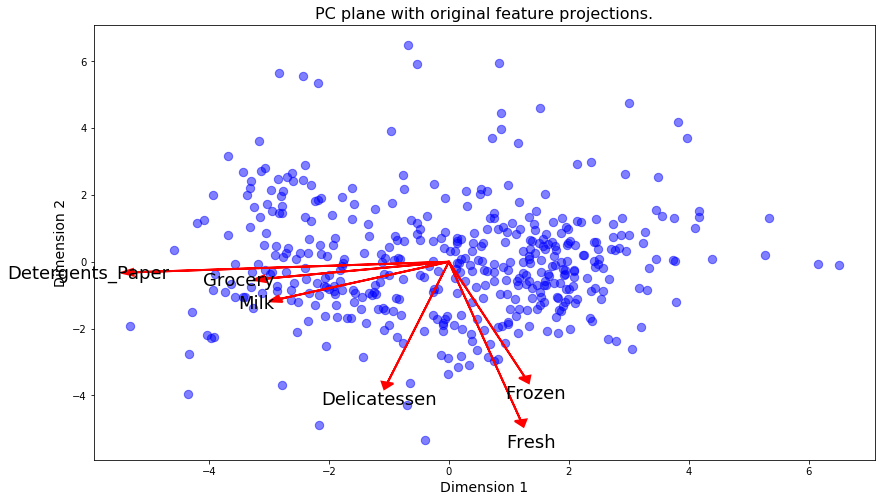

In [89]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca_two)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

The advantages of the K-Means clustering algorithm is that it provides is an efficient framework for segmenting customers, especially if we assume that some underlying or "true" segmentation exists. Let's use a real-world example: imagine we are working for an ecommerce company, and assume that age is the most influential factor that correlates with different clusters of spending habits. Perhaps our marketing team is going to run 10 "personalized" campaigns based on these assumed clusters, being the underlying segments. We would simply stick K=10 and apply the formula, to breakdown people into segments. For this example, it might be broken down into 10 distinct age groups: 10-19 year old, 20-29 year old, etc. This points to another advantage of k-means clustering: when the number of dimensions are small, and when we assume an underlying distribution, it is an especially simple and quick algorithm to implement.

The Gaussian Mixture Model's advantage is a result of the assumptions it rejects: put simply, the Gaussian mixture model recognizes that  "noise" (or randomness) will exist within a data set. Compared to K-means clustering which forces a given data set into K clusters, the Gaussian mixture model doesn't assume that a specific number of 'true' clusters exists, thereby accounting for the randomness that exists within the data.

In summary, K-means is a hard clustering assignment (it's deterministic) whereas the Gaussian Mixture Model indicates a soft clustering assignment (it's probabilistic). In this example, we have not been presented with a goal of determinging exact categories; for instance, we are not tasked with explicitly discerning between small groceries vs. restaurants vs. supermarkets. Additionally (but perhaps less important), because we have such a small sample size of n<500, the potential for gaussian noise influencing our model is high. For these reasons, I'll use the Gaussian Mixture Model. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [90]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture #selected in favor of k-means
for i in range (2,10):
    clusterer = GaussianMixture(n_components=i, random_state=1).fit(reduced_data) #asked to cluster on reduced data

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    scores = silhouette_score(reduced_data,preds)
    print(scores)


0.418591326493
0.417052558631
0.329191386662
0.302945478704
0.252474039705
0.330948733571
0.30228234754
0.285191468551


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

n=2: 0.418591326493

n=3: 0.417052558631

n=4:0.329191386662

n=5:0.302945478704

n=6:0.252474039705

n=7:0.330948733571

n=8:0.30228234754

n=9:0.285191468551

The best silhoutte score (rounded to four decimals points) was .4186, for n=2. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

0.418591326493


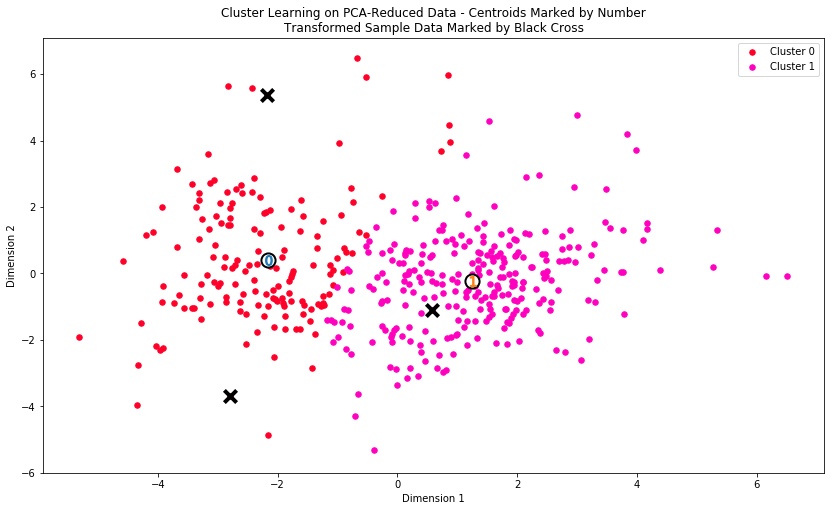

In [91]:
clusterer = GaussianMixture(n_components=2, random_state=1).fit(reduced_data) #asked to cluster on reduced data
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.means_
scores = silhouette_score(reduced_data,preds)
print(scores) #just to confirm that scores are the same as above (hence why I used the same random_state)


# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [92]:
# TODO: Inverse transform the centers
log_centers = pca_two.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

#For question 8, helpful to recall summary statistics
display(data.describe())

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  3370.0  7619.0  11853.0   842.0            4493.0         894.0
Segment 1  9180.0  2130.0   2774.0  2114.0             354.0         746.0

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

In each case, we can compare the ratio of the Cluster X spending vs. mean spending, across the six categories, to indicate the type of establishment. 

Segment 0: This cluster's true mean for grocery is  greater than the mean for the category: 11,853 vs. less than 9,000. Additionally, spending on Detergents_Paper in this segment is higher than the data's mean (4493 vs. ~2881). Spending on fresh ingredients is perhaps the most interesting though: unlike the categories above, spending on fresh items is less than one third of the mean spending amount (3370 vs. ~12000). It's also interesting to note that Delicatessen spending is relatively similar between segments 0 and 1, indicating that the feature is relatively unimportant. For these reasons, it's clear that this segment is most likely comprised of large distributors and supermarkets. 


Segment 1: This category of customers spends more than twice as much on the fresh category, compared to segment 0. Additionally, it deviates significantly in the "grocery" category, spending roughly one fourth the amount compared to segment 0. Directly compared to the mean: Segment 1 spends less than 2,800 on grocery, whereas the mean is greater than 7,900. Also, the true center of spending on Detergents_Paper within Segment 0 is more than ten times higher than spending Detergents_Paper spending in Segment 1. Finally, they accound for a larger proportion of frozen foods. For these reasons, we can predict that the this category is mainly comprised of restaurants and smaller stores, like gas station marts. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [93]:
# Display the predictions
for i, preds in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", preds

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

Yes, the predictions for each sample point are consistent! 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

I'd propose a couple different ways to run A/B tests, based on the flexibility of executive management and the size of the company (that said, I'd probably prefer the second option in most cases). Overall: we should expect customers within a segment to behave similarly, but can not assume that the changes will affect the segments equally. 

First, if our company is being cautious in our approach (maybe we're afraid of testing new delivery schedules for our highest paying customers), we might use the customer segments to first determine which segment to A/B test. For instance, we may decide that we only want to test 3 day delivery for Customer Segment One because they spend less money overall, and therefore a negative impact would have a lower potential downside. 

Second, if we are being less cautious, we could run A/B tests across a random sample from both customer segments. Then, we could use statistical analysis to compare the feedback across segments. For instance, we could statistically analyze the difference of sample means between segments 0 and 1. By testing both segments, we could thoroughly test which distinguish whether customers responded favorably based on their classified cluster. We would then adjust our delivery schedule based on the results of these experiments, without having to run the experiment for all customers, because we can generalize the results based on our clusters. 

For example, we might conclude that changing the delviery to 3 days a week has statistically signficant negative effect on segment 0 (while saving our company money), whereas it had a negative effect on segments 1. In that hypothetical, we would only change our delivery schedule to 3 days a week for customers in segment 0, and remain at five days a week for customers in segment 1. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

If we are considering new customers, our target variable would be the prospective customer's segment, i.e. the engineered feature. We would use their spending estimates (as inputs) in order to predict their label (customer segment). 

Within the context of a supervised learner, our variables would be:

X_train: The full list of spending by category, for all original data points, as indicated by customers.csv. 
Y_train: The categories that we assigned to each point, as seen in the 'cluster visualization' portion.
X_test: The new customers' forecasts.
Y_test: The new customers' segment categories that we're predicting 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

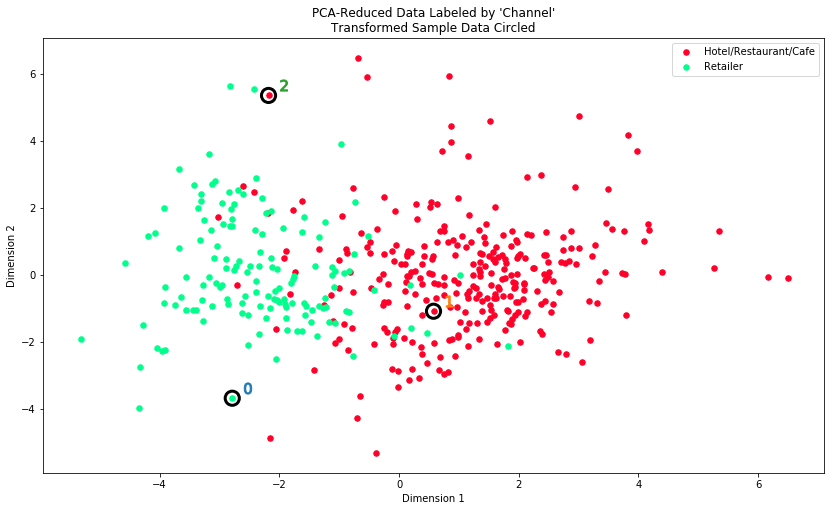

In [94]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The clustering algorithm I used also had k=2. The graph displayed in the 'cluster visualization' section looks extremely similar to the graph above that is split on the "actual" labels. The actual data is a bit noisier, in that there is more overlap in the true data than in the Gaussian prediction. Visually, this noise is indicated by the seeming "overlap" of green points within the heart of the red cluster, and vice versa. 

The gaussian model we used assigned "soft" categorizations, meaning they were probabilistic, whereas the underlying distribution purely/deterministically divides the data between 'Retailers' and 'Hotels/Restaurants/Cafes'. This turned out to be a great choice, because noise the data was in fact noisy, with respect to the categorization.

I certainly consider this classification as consistent with my previous definition of customer segments, though I would change my label to include "hotel", since I primarily only characterized segment 1 as restaurants and smaller stores. The evidence for consistency is the high degree of similarity between the two scatterplot graphs. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.